In [4]:
#ML Models for Regression
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.linear_model import Lasso, RidgeCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor


In [13]:
data=pd.read_csv('kc_house_data.csv')
data.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
print(data.shape)

(21613, 21)


<Axes: >

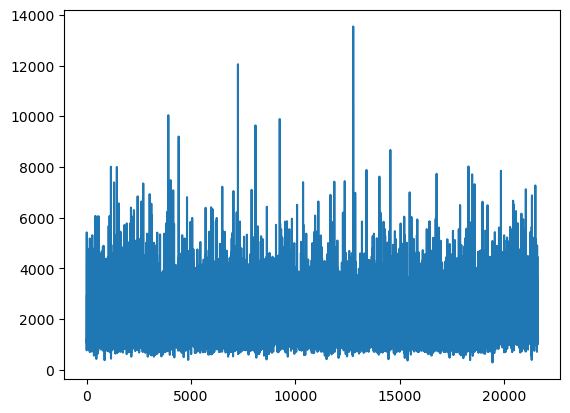

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
data['sqft_living'].plot()


In [16]:
final_data=data.drop(['id','date','view','waterfront','sqft_basement','condition','grade','sqft_above','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'],axis=1)
final_data


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
0,221900.0,3,1.00,1180,5650,1.0,1955
1,538000.0,3,2.25,2570,7242,2.0,1951
2,180000.0,2,1.00,770,10000,1.0,1933
3,604000.0,4,3.00,1960,5000,1.0,1965
4,510000.0,3,2.00,1680,8080,1.0,1987
...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,2009
21609,400000.0,4,2.50,2310,5813,2.0,2014
21610,402101.0,2,0.75,1020,1350,2.0,2009
21611,400000.0,3,2.50,1600,2388,2.0,2004


In [17]:
final_y=final_data.pop('sqft_living')
print(final_y)


0        1180

1        2570

2         770

3        1960

4        1680

         ... 

21608    1530

21609    2310

21610    1020

21611    1600

21612    1020

Name: sqft_living, Length: 21613, dtype: int64


In [18]:
final_x=final_data
print(final_x)


          price  bedrooms  bathrooms  sqft_lot  floors  yr_built

0      221900.0         3       1.00      5650     1.0      1955

1      538000.0         3       2.25      7242     2.0      1951

2      180000.0         2       1.00     10000     1.0      1933

3      604000.0         4       3.00      5000     1.0      1965

4      510000.0         3       2.00      8080     1.0      1987

...         ...       ...        ...       ...     ...       ...

21608  360000.0         3       2.50      1131     3.0      2009

21609  400000.0         4       2.50      5813     2.0      2014

21610  402101.0         2       0.75      1350     2.0      2009

21611  400000.0         3       2.50      2388     2.0      2004

21612  325000.0         2       0.75      1076     2.0      2008



[21613 rows x 6 columns]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.33, random_state=42)
X_train.head()


,price,bedrooms,bathrooms,sqft_lot,floors,yr_built
16197,840000.0,4,2.75,2750,1.5,1936
16993,302000.0,3,2.50,9492,2.0,1994
17538,425000.0,4,1.75,11890,1.0,1955
5761,215000.0,4,2.50,4496,2.0,2004
18921,565000.0,5,1.75,9720,1.0,1955


In [20]:
y_train.head()

16197    2600
16993    2140
17538    1730
5761     2130
18921    1910
Name: sqft_living, dtype: int64

In [21]:
print(y_test)

735      2070

2830     2900

4106     3770

16218    4560

19964    2550

         ... 

15257    1610

13822    2320

18411    1610

20188    1460

13030    1250

Name: sqft_living, Length: 7133, dtype: int64


In [22]:
ML_models = [
    LinearRegression(),
    SVR(),
    LinearSVR(),
    NuSVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=5, random_state=42),
    GradientBoostingRegressor(),
    ]

name = []
score = []
models = []
rmse = []

for model in ML_models:
    model.fit(X_train, y_train)   
    name.append(type(model).__name__)
    score.append(model.score(X_test, y_test))
    models.append(model)
    rmse.append(np.sqrt(mean_squared_error(model.predict(X_test), y_test)))
    
df_score = pd.DataFrame(list(zip(name,rmse, score, models)),columns=['name','rmse','score',"model"])
df_score.set_index('name',inplace=True)
df_score.sort_values(by=['score'],inplace=True)
df_score


C:\Users\ASUS\anaconda3\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

  warnings.warn(


,rmse,score,model
name,,,
LinearSVR,838.286267,0.199734,LinearSVR()
NuSVR,752.241077,0.355588,NuSVR()
SVR,746.994000,0.364546,SVR()
DecisionTreeRegressor,547.161434,0.659058,DecisionTreeRegressor()
LinearRegression,465.317186,0.753426,LinearRegression()
RandomForestRegressor,442.281646,0.777235,"(DecisionTreeRegressor(max_features=1.0, rando..."
GradientBoostingRegressor,399.918199,0.817866,([DecisionTreeRegressor(criterion='friedman_ms...


In [32]:
X_new=pd.DataFrame({"price":40000, "bedrooms":3, "bathrooms":2, "sqft_lot":5000, "floors":2, "yr_built":2000}, index=[0])
X_new


,price,bedrooms,bathrooms,sqft_lot,floors,yr_built
0,40000,3,2,5000,2,2000


In [33]:
RFmodel = df_score.loc["GradientBoostingRegressor","model"]
predict = RFmodel.predict(X_new) 
predict

array([1444.66960418])

In [34]:
rfm=GradientBoostingRegressor()

rfm.fit(X_train, y_train)
rfm.predict(X_new)


array([1444.66960418])

In [35]:
#GRID SEARCH

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [43]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

param_grid = { 
    'n_estimators': [5,10],
    'max_features': ['auto', None],
    'max_depth' : [1,2,None],
    'criterion' :['squared_error', 'absolute_error']
}

rfr=RandomForestRegressor(random_state=42)



rfr1=RandomForestRegressor(random_state=42, max_features="auto", n_estimators= 10, max_depth=None, criterion='squared_error')
rfr1.fit(X_train, y_train)
pred=rfr1.predict(X_test)
print("R2 for Random Forest on kc_house_data data: ",rfr1.score(X_train,y_train))



R2 for Random Forest on kc_house_data data:  0.9632580612510797


In [44]:
artrcm = adjustedR2(rfr1.score(X_train,y_train),X_train.shape[0],len(X_train.columns))

artrcm


0.9632453688582551

In [45]:
rmsecm = np.sqrt(metrics.mean_squared_error(y_test,pred))

rmsecm


424.67608971405633

In [46]:
metrics.mean_squared_error(y_test,pred)

180349.78117482123

In [47]:
np.corrcoef(pred,y_test)[0,1]

0.8917042780008506

In [48]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr})

forecast_accuracy(pred,y_test)


{'mape': 0.15502363353650814,
 'me': 3.442506659189683,
 'mae': 305.3758586849853,
 'mpe': 0.03510118405232481,
 'rmse': 424.67608971405633,
 'corr': 0.8917042780008506}

In [49]:
forecast_accuracy_metrics=forecast_accuracy(pred,y_test)

rfr1.feature_importances_*100


array([39.39503819,  4.23659636, 37.30345693, 12.6488695 ,  1.13230893,
        5.28373008])

In [50]:
final_x.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'yr_built'], dtype='object')

In [51]:
{"Importance": rfr1.feature_importances_*100}

{'Importance': array([39.39503819,  4.23659636, 37.30345693, 12.6488695 ,  1.13230893,
         5.28373008])}

In [52]:
Importance = pd.DataFrame({"Importance": rfr1.feature_importances_*100},
                         index = X_train.columns)

importances = rfr1.feature_importances_

importances


array([0.39395038, 0.04236596, 0.37303457, 0.1264887 , 0.01132309,
       0.0528373 ])

In [53]:
indices = np.argsort(importances)[::-1]

indices


array([0, 2, 3, 5, 1, 4], dtype=int64)

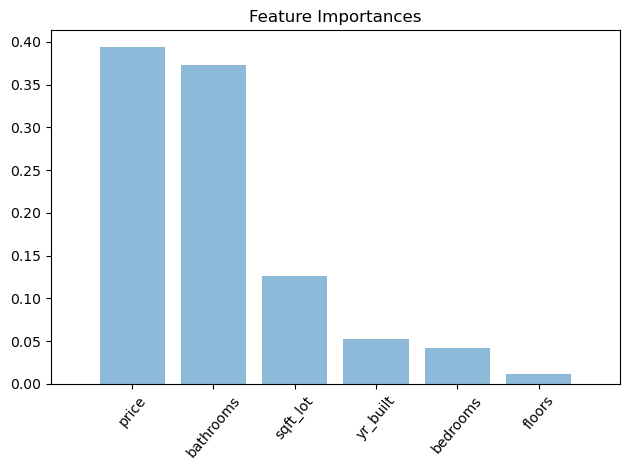

In [54]:
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           final_x.columns.values[indices], rotation=50)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


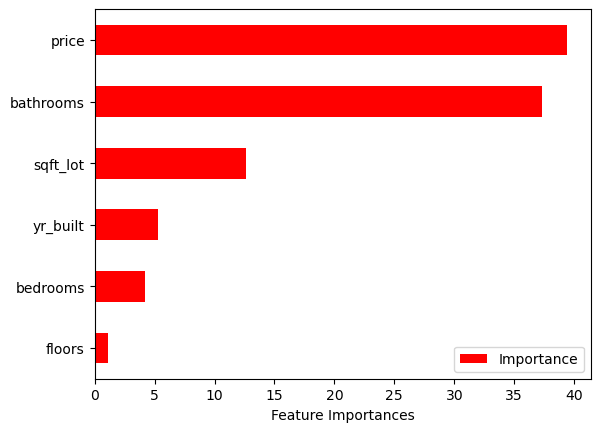

In [55]:
def feature_importance(x_train,regressor_name):
    Importance = pd.DataFrame({"Importance": regressor_name.feature_importances_*100},
                         index = x_train.columns)
    importance_values=Importance.sort_values(by = "Importance", 
                           axis = 0, ascending=False)
    Importance.sort_values(by = "Importance", 
                           axis = 0, 
                           ascending = True).plot(kind ="barh", color = "r")
    plt.xlabel("Feature Importances")
    importance_index=importance_values.index
    return importance_index

results=feature_importance(final_x,rfr1)


In [56]:
X_train[results[0:2]]

,price,bathrooms
16197,840000.0,2.75
16993,302000.0,2.50
17538,425000.0,1.75
5761,215000.0,2.50
18921,565000.0,1.75
...,...,...
11964,378000.0,1.50
21575,399950.0,2.50
5390,575000.0,2.50
860,245000.0,0.75


In [58]:
rfr1=RandomForestRegressor(random_state=42, max_features="auto", n_estimators= 10, max_depth=None, criterion='squared_error')

def rfe_selection(x_train,y_train,regressor_name): 
    rfe = RFE(estimator=regressor_name, n_features_to_select=1, step=1)
    rfe.fit(x_train, y_train)
    ranking=pd.DataFrame({"Importance":rfe.ranking_}, index = x_train.columns)
    importance_results=ranking.sort_values(by = "Importance", 
                           axis = 0, ascending=True)
    return importance_results

rfe_selection(X_train,y_train,rfr1)


,Importance
price,1
bathrooms,2
sqft_lot,3
yr_built,4
bedrooms,5
floors,6
